### Importing important Libraries

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing 
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
sns.set()                   

C:\Users\Prakhar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing dataset and creating a deep copy

In [2]:
advertising=pd.read_csv('advertising.csv')
data=advertising.copy()

### Examining the data

In [3]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


#### Converting timestamp to datetime format

In [6]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


### Checking Null values

In [7]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Checking Duplicated Values

In [8]:
data.duplicated().sum()

0

### Categorizing Qualitative and Quantitative Columns 

In [9]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [10]:
qual = data.select_dtypes(include = ['object']).columns

In [11]:
quan = set(data.columns) - set(qual)
quan = quan - {'Timestamp'}

In [12]:
data[qual].describe()

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Balanced disintermediate conglomeration,Lisamouth,Czech Republic
freq,1,3,9


In [13]:
data[quan].describe()

,Clicked on Ad,Age,Male,Daily Time Spent on Site,Area Income,Daily Internet Usage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,36.009000,0.481000,65.000200,55000.000080,180.000100
std,0.50025,8.785562,0.499889,15.853615,13414.634022,43.902339
min,0.00000,19.000000,0.000000,32.600000,13996.500000,104.780000
25%,0.00000,29.000000,0.000000,51.360000,47031.802500,138.830000
50%,0.50000,35.000000,0.000000,68.215000,57012.300000,183.130000
75%,1.00000,42.000000,1.000000,78.547500,65470.635000,218.792500
max,1.00000,61.000000,1.000000,91.430000,79484.800000,269.960000


### Integrating timestamp for more useful features

In [14]:
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour
data['Weekday'] = data['Timestamp'].dt.dayofweek


### Visualisation

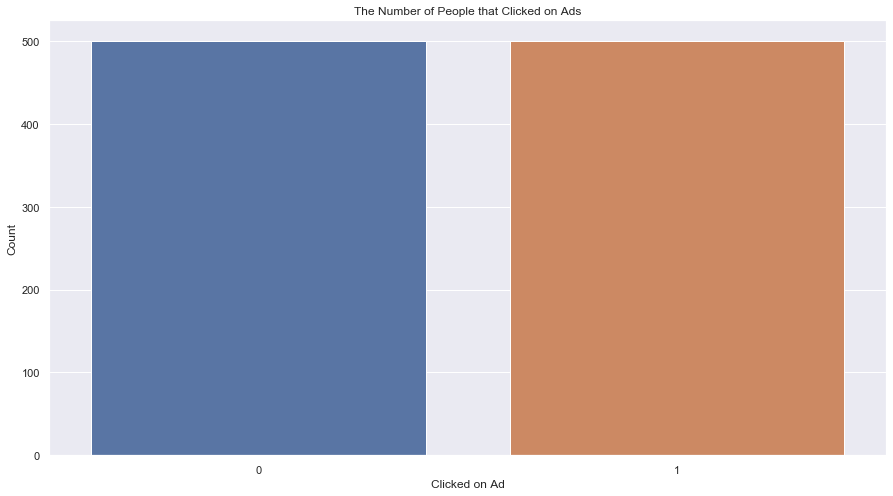

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(x=data['Clicked on Ad'])
plt.title("The Number of People that Clicked on Ads")
plt.xlabel("Clicked on Ad")
plt.ylabel("Count")
plt.show()

Number of users clicking and not clicking on AD is equal

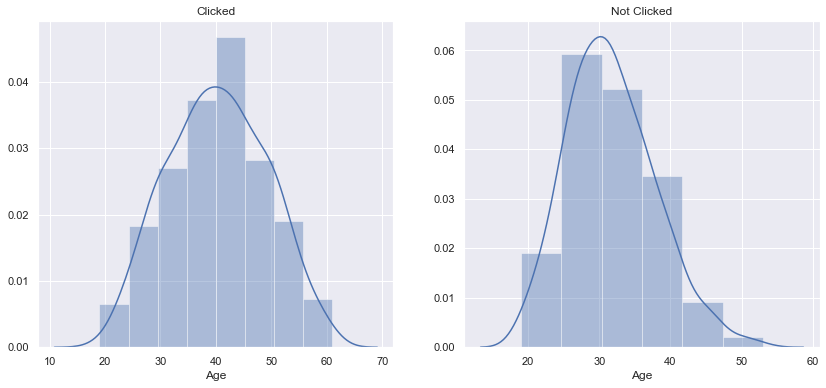

In [16]:
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)        
clicked = data.where(data['Clicked on Ad']==1).dropna()
sns.distplot(clicked['Age'],bins=8)
plt.title('Clicked')
plt.subplot(1,2,2)
notClicked = data.where(data['Clicked on Ad']==0).dropna()
sns.distplot(notClicked['Age'],bins=6)
plt.title('Not Clicked')
plt.show()

- Users more than age of 40 are more likely to click on ad.
- Users less than age 30 are less likely to click on ad.

But there is something more to it lets explore </h4>

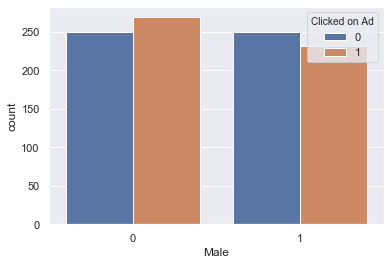

In [17]:
sns.countplot(data['Male'],hue = data['Clicked on Ad'])

Equal number of male and female users are likely to click and not click on the ad

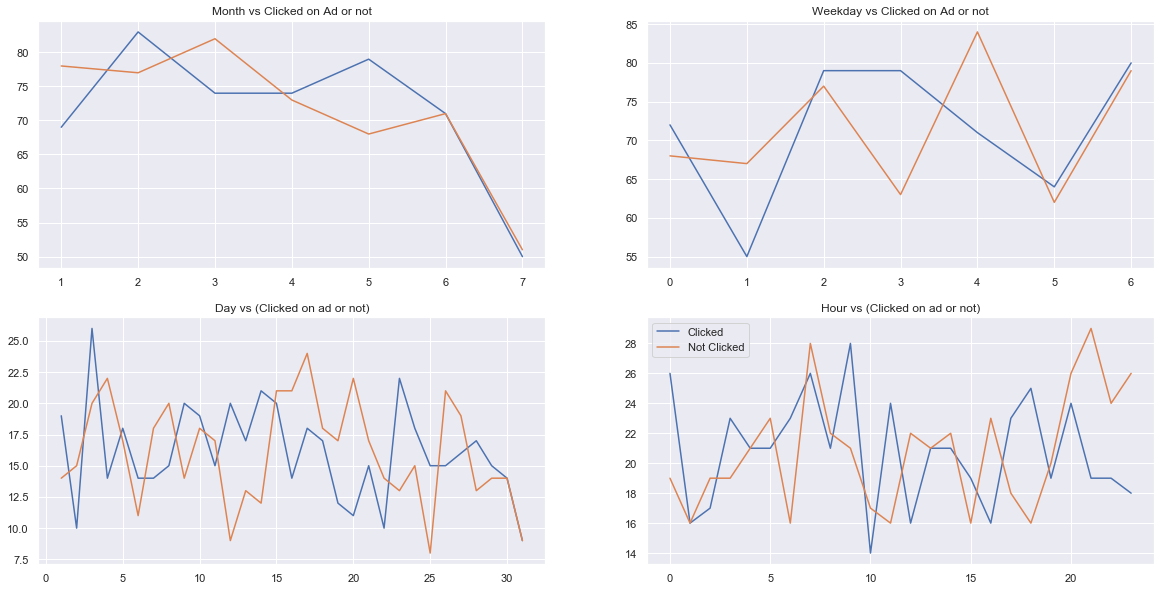

In [18]:
f,ax=plt.subplots(2,2, figsize=(20,10))
data['Month'][data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0,0])
data['Month'][data['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax[0,0])
ax[0,0].set_title('Month vs Clicked on Ad or not')

data['Weekday'][data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0,1])
data['Weekday'][data['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax[0,1])
ax[0,1].set_title('Weekday vs Clicked on Ad or not')

data['Day'][data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[1,0])
data['Day'][data['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax[1,0])
ax[1,0].set_title('Day vs (Clicked on ad or not)')

data['Hour'][data['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[1,1])
data['Hour'][data['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax[1,1])
ax[1,1].set_title('Hour vs (Clicked on ad or not)')
plt.legend(('Clicked','Not Clicked'))
plt.show()

We have data limited to 7 months. No other important information can be drawn using datetime variables

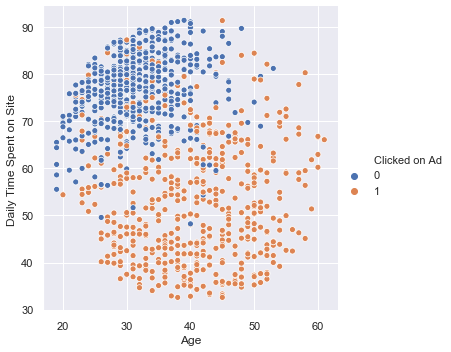

In [19]:
sns.relplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = data) 

Clearly there are 2 groups of people mostly clicking on the advertisement
 - people more than age of 40 
 - people less than age of 40 and spending less time on site

<Figure size 720x720 with 0 Axes>

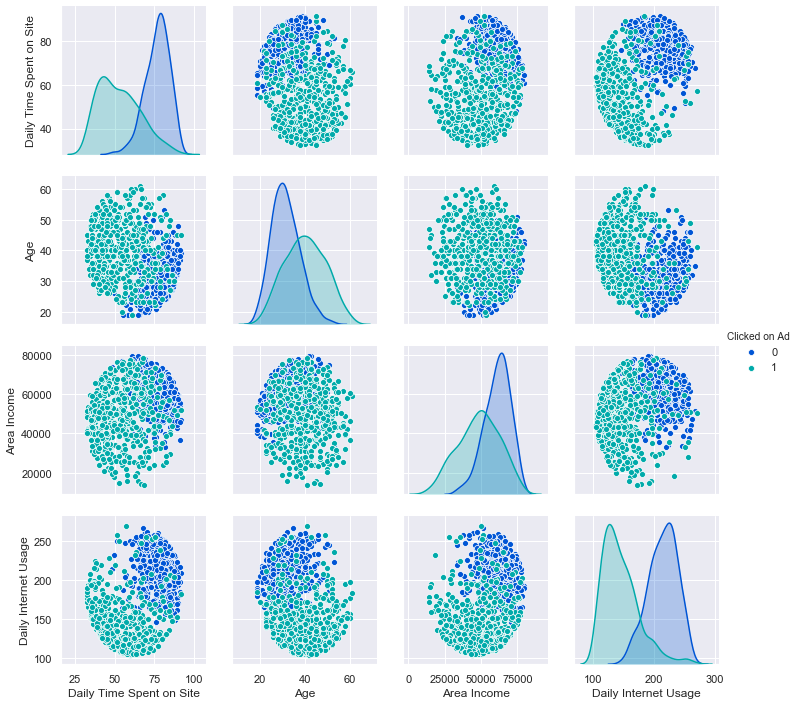

In [20]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue ='Clicked on Ad',
    vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],
    diag_kind='kde',
    palette='winter'
)
plt.show()

Pairplot represents the relationship between our target variable and other variables. 

We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad. 

## Building MODEL 

### Importing important libararies

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Checking Correlation between variables

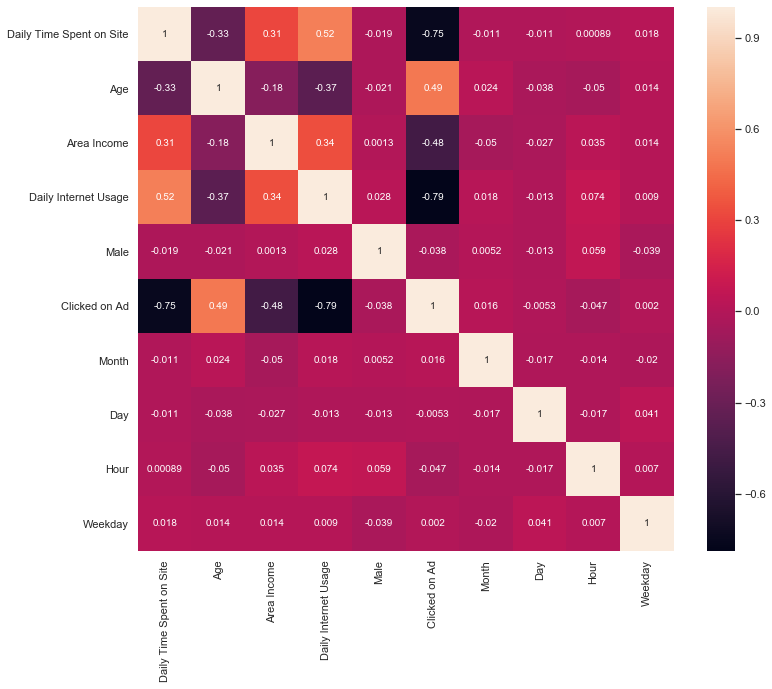

In [22]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True) # Degree of relationship i.e correlation using heatmap

### Picking variables having most affect on 'Clicked on Ad'

In [23]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']]
y = data['Clicked on Ad']

### Splitting data into training and testing set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=22)

### Scaling the data

In [25]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

### Training a logistic regression Classifier

In [26]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
prediction = logistic.predict(X_test)

#### Analyzing the model

Text(0.5, 1, 'Confusion matrix for Logistic Regression')

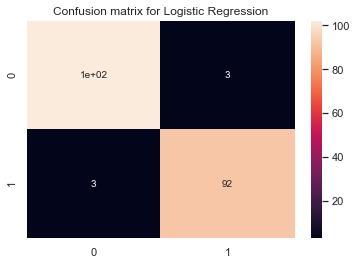

In [27]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix for Logistic Regression')

In [28]:
cr = classification_report(y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.97      0.97      0.97        95

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



### Training a Random Forest Classifier

In [29]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction2 = forest.predict(X_test)

#### Analyzing the model

Text(0.5, 1, 'Confusion matrix for Random Forest')

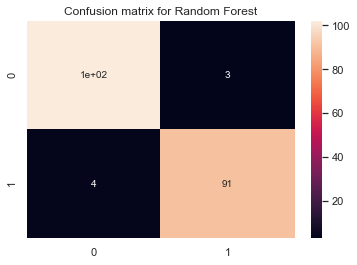

In [30]:
cm2 = confusion_matrix(y_test, prediction2)
sns.heatmap(cm2,annot=True)
plt.title('Confusion matrix for Random Forest')

In [31]:
cr2 = classification_report(y_test, prediction2)
print(cr2)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       105
           1       0.97      0.96      0.96        95

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



### Training K Neighbors Classifier

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction3 = knn.predict(X_test)

#### Analyzing the model

Text(0.5, 1, 'Confusion matrix for KNN')

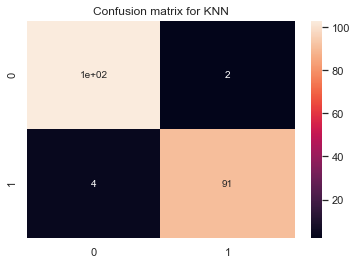

In [33]:
cm3 = confusion_matrix(y_test, prediction3)
sns.heatmap(cm3,annot=True)
plt.title('Confusion matrix for KNN')

In [34]:
cr3 = classification_report(y_test, prediction3)
print(cr3)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       105
           1       0.98      0.96      0.97        95

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



### Improving the model using GridSearch 

#### - Random Forest Classifier

In [35]:
from sklearn.model_selection import GridSearchCV
param_frst = [{"n_estimators": [10,100,200,300,500], "criterion": ["gini", "entropy"]}]
grid_search_frst = GridSearchCV(estimator=forest,
                          param_grid=param_frst,
                          scoring = 'accuracy',
                          cv=10)
grid_search_frst = grid_search_frst.fit(X_train, y_train)

Best Accuracy

In [36]:
best_acc_frst = grid_search_frst.best_score_
best_acc_frst

0.96

Parameters for best accuracy

In [37]:
best_params_frst = grid_search_frst.best_params_
best_params_frst

{'criterion': 'gini', 'n_estimators': 100}

#### - K Neighbor Classifier

In [38]:
from sklearn.model_selection import GridSearchCV
param_knn = [{"n_neighbors": range(1,10), "weights": ["uniform", "distance"]}]
grid_search_knn = GridSearchCV(estimator=knn,
                          param_grid=param_knn,
                          scoring = 'accuracy',
                          cv=10)
grid_search_knn = grid_search_knn.fit(X_train, y_train)

Best Accuracy

In [39]:
best_acc_knn = grid_search_knn.best_score_
best_acc_knn

0.9650000000000001

Parameters For Best Accuracy

In [40]:
#Calculation best parameters for K-Nearest Neighbors model
best_params_knn = grid_search_knn.best_params_
best_params_knn

{'n_neighbors': 7, 'weights': 'uniform'}

### Training model with new parameters

In [41]:
forest2 = RandomForestClassifier(n_estimators=100, criterion='gini')
forest2.fit(X_train, y_train)
prediction2 = forest2.predict(X_test)

In [42]:
knn2 = KNeighborsClassifier(n_neighbors=7, weights= 'uniform')
knn2.fit(X_train, y_train)
prediction3 = knn2.predict(X_test)

### Plotting ROC CURVE

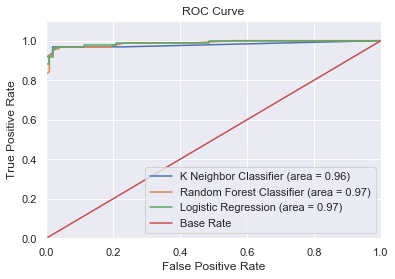

In [43]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, logistic.predict(X_test))
rf_roc_auc = roc_auc_score(y_test, forest2.predict(X_test))
knn_roc_auc = roc_auc_score(y_test, knn2.predict(X_test))

#Create ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, forest2.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn2.predict_proba(X_test)[:,1])


plt.figure()
# Plot KNN ROC
plt.plot(knn_fpr, knn_tpr, label='K Neighbor Classifier (area = %0.2f)' % knn_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Hence Logistic Regression and Random Forest Classifier are recommended model based on roc_auc score